# Seattle Airbnb data

In [67]:
# install packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels
import sklearn
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from IPython.display import Image
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

## preparation

In [14]:
# load data
listings = pd.read_csv('listings.csv')
listings.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       

In [15]:
# select variables
df = listings[["host_response_rate", "host_acceptance_rate", "host_is_superhost",
               "host_listings_count", "zipcode", "property_type","room_type", "accommodates", "bathrooms", "bedrooms", 
               "beds", "price", "number_of_reviews", "review_scores_rating", "cancellation_policy", 
               "reviews_per_month"]]
df=df.dropna(axis=0)
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
0,96%,100%,f,3.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$85.00,207,95.0,moderate,4.07
1,98%,100%,t,6.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$150.00,43,96.0,strict,1.48
2,67%,100%,f,2.0,98119,House,Entire home/apt,11,4.5,5.0,7.0,$975.00,20,97.0,strict,1.15
6,100%,100%,t,1.0,98119,House,Private room,2,1.0,1.0,1.0,$80.00,58,99.0,moderate,2.46
7,100%,100%,t,5.0,98119,Cabin,Private room,2,1.0,1.0,1.0,$60.00,173,97.0,strict,4.73


In [16]:
# data cleaning

## delete % and $
df['host_response_rate'] = df['host_response_rate'].astype(str).str.replace("%", "").astype("float")
df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(str).str.replace("%", "").astype("float")
df['price'] = df['price'].astype(str).str.replace("[$, ]", "").astype("float")
df['superhost']=np.where(df['host_is_superhost']=='t',1,0)
del df['host_is_superhost']

# make dummy variables
non_num_vars = df.select_dtypes(include=['object']).columns
dummy_vars = pd.get_dummies(df[non_num_vars])
df=df.drop(non_num_vars,axis=1)
df = pd.merge(df,dummy_vars, left_index=True, right_index=True)


df.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,...,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,96.0,100.0,3.0,4,1.0,1.0,1.0,85.0,207,95.0,...,0,0,0,0,1,0,0,0,1,0
1,98.0,100.0,6.0,4,1.0,1.0,1.0,150.0,43,96.0,...,0,0,0,0,1,0,0,0,0,1
2,67.0,100.0,2.0,11,4.5,5.0,7.0,975.0,20,97.0,...,0,0,0,0,1,0,0,0,0,1
6,100.0,100.0,1.0,2,1.0,1.0,1.0,80.0,58,99.0,...,0,0,0,0,0,1,0,0,1,0
7,100.0,100.0,5.0,2,1.0,1.0,1.0,60.0,173,97.0,...,0,0,0,0,0,1,0,0,0,1


In [77]:
df.to_csv("seattle_airbnb_data.csv")

## data visualization

Text(0.5, 1.0, 'Histogram of listing prices')

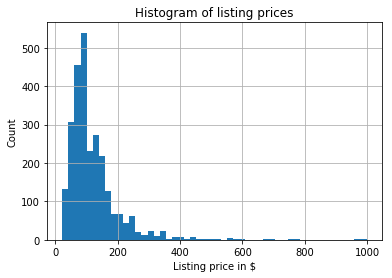

In [17]:
df['price'].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices')

Text(0.5, 1.0, 'No. of bedrooms vs price')

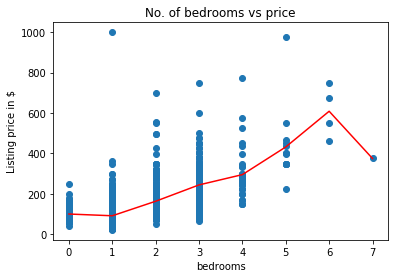

In [29]:
bed_group = df.groupby('bedrooms')
cond_means = bed_group["price"].mean()
plt.scatter(df['bedrooms'], df['price'])
plt.plot(cond_means, color="r")
plt.xlabel('bedrooms')
plt.ylabel('Listing price in $')
plt.title('No. of bedrooms vs price')

/Users/keiikegami/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


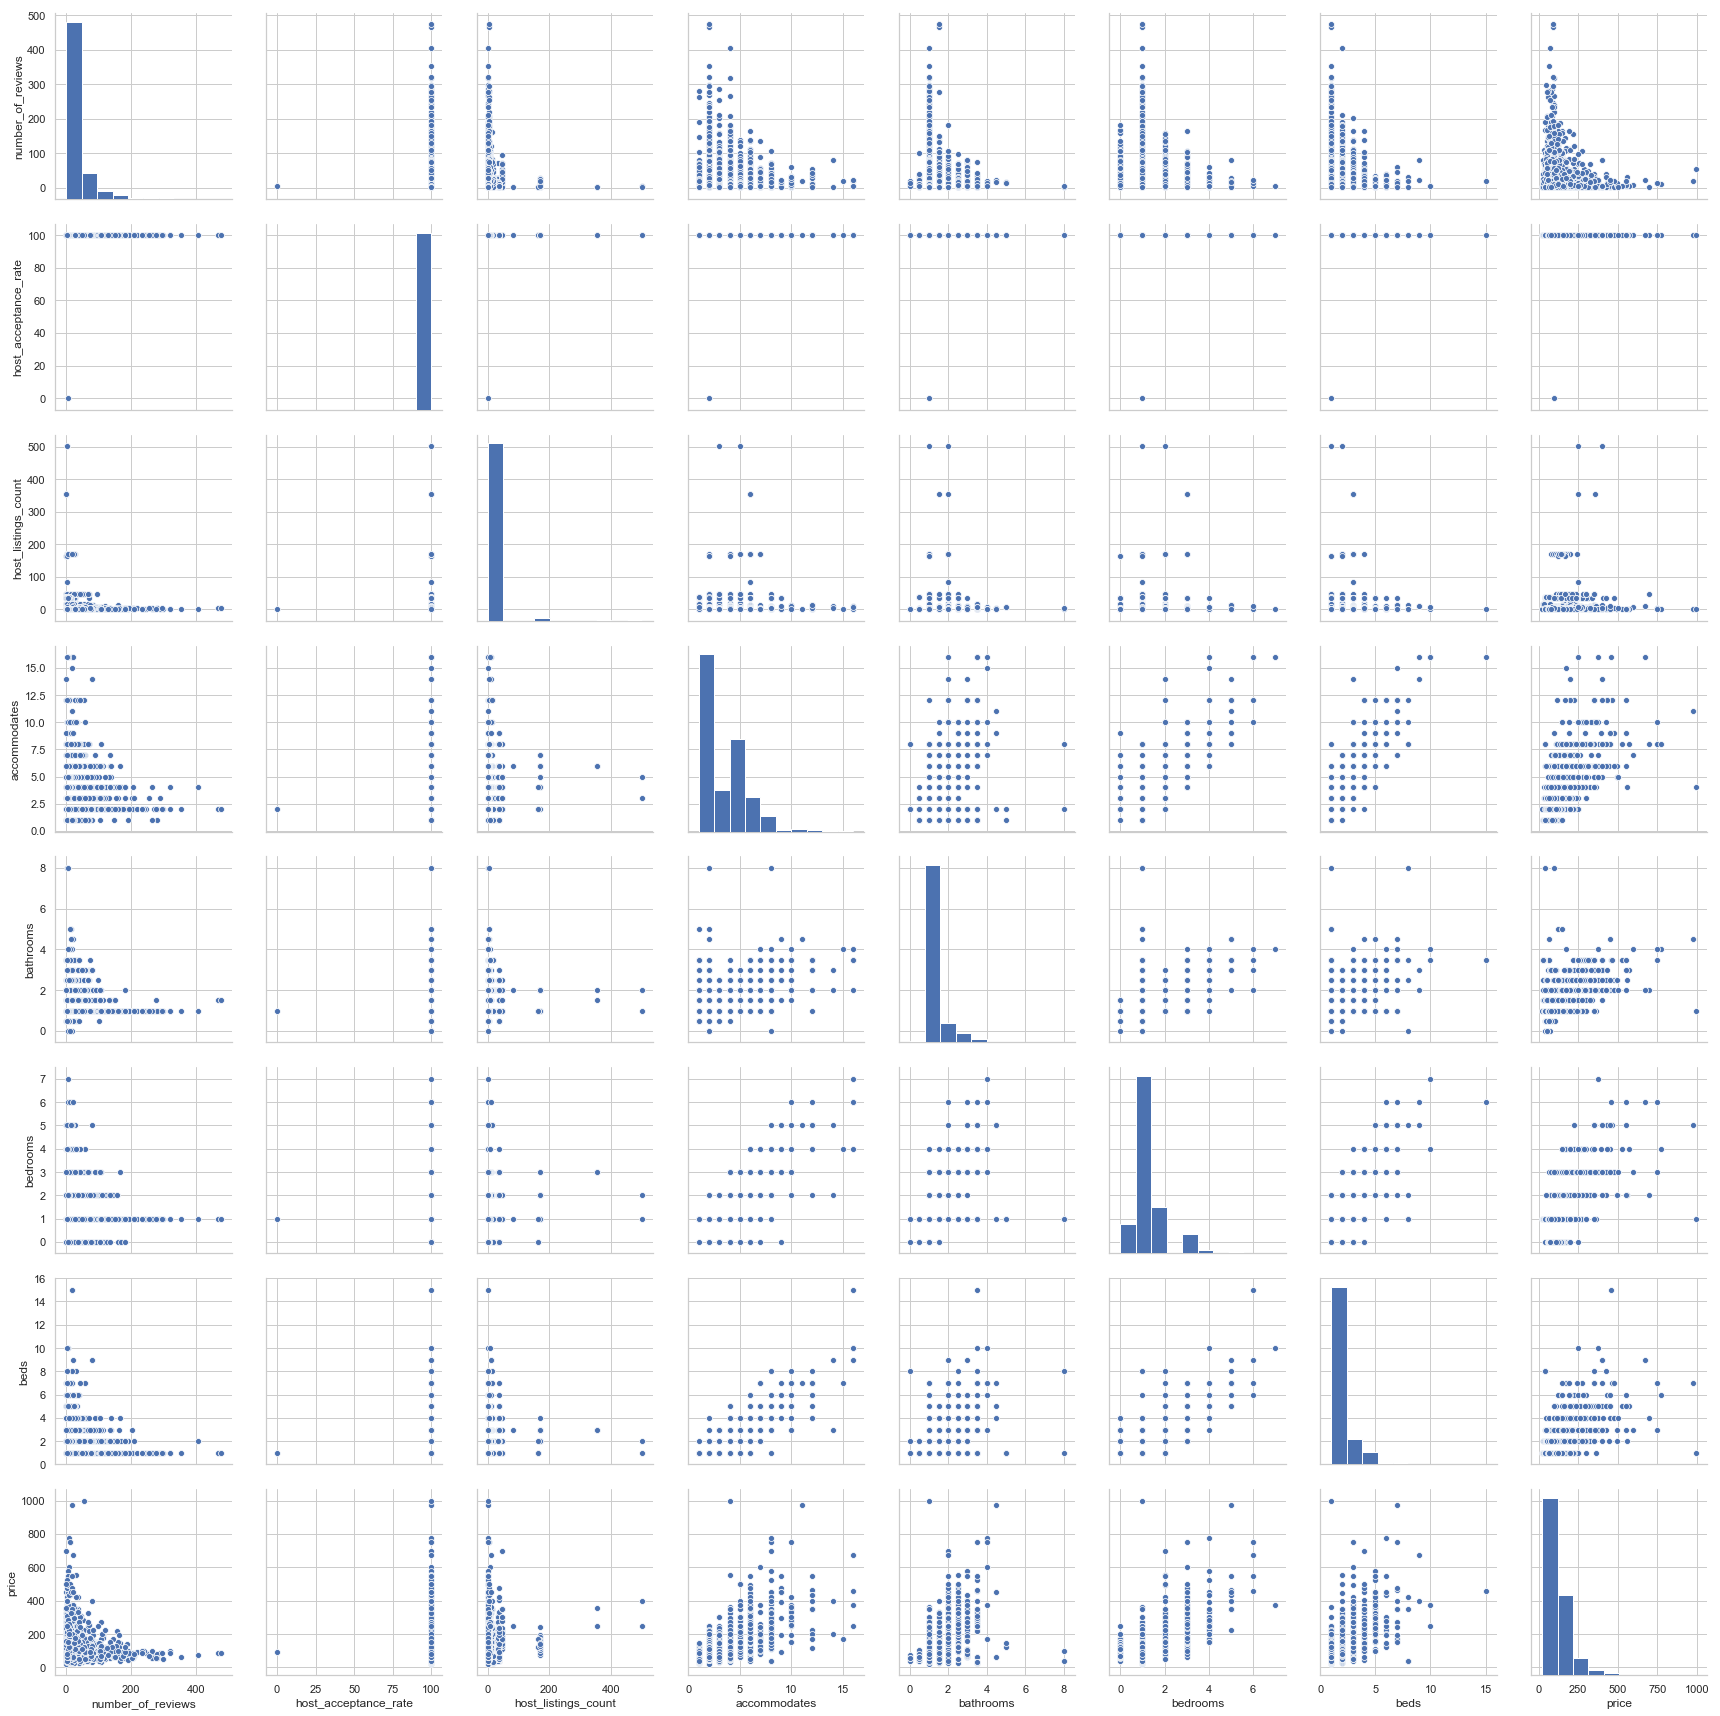

In [31]:
# seaborn 
cols = ['number_of_reviews','host_acceptance_rate','host_listings_count','accommodates',
       'bathrooms','bedrooms','beds','price']
sns.set(style = 'whitegrid',context = 'notebook')
sns.pairplot(df[cols],size=3)
plt.show()

## estimate models

### linear regression

In [41]:
# splitting data
y = df['price']
x = df.drop('price', axis =1)
indices = np.random.permutation(len(df))
train_size = int(round(0.8*len(df)))
test_size = len(df)-train_size
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=123)

# model fit
slr = linear_model.LinearRegression()
slr.fit(X_train, y_train)

# predict
y_train_pred_ols = slr.predict(X_train)
y_test_pred_ols = slr.predict(X_test)

In [42]:
rms_ols2=np.sqrt(mean_squared_error(y_test,y_test_pred_ols))
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred_ols),
        mean_squared_error(y_test, y_test_pred_ols)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred_ols),
        r2_score(y_test, y_test_pred_ols)))

MSE train: 2095.412, test: 3417.828
R^2 train: 0.686, test: 0.475


### Lasso

In [65]:
# model fit
slr = linear_model.Lasso(alpha=0.1)
slr.fit(X_train, y_train)

# predict
y_train_pred_lasso = slr.predict(X_train)
y_test_pred_lasso = slr.predict(X_test)

In [66]:
rms_ols2=np.sqrt(mean_squared_error(y_test,y_test_pred_lasso))
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred_lasso),
        mean_squared_error(y_test, y_test_pred_lasso)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred_lasso),
        r2_score(y_test, y_test_pred_lasso)))

MSE train: 2157.329, test: 3311.940
R^2 train: 0.677, test: 0.492


### Random Forest

In [75]:
forest = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=12, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred_rf = forest.predict(X_train)
y_test_pred_rf = forest.predict(X_test)

In [76]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred_rf),
        mean_squared_error(y_test, y_test_pred_rf)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred_rf),
        r2_score(y_test, y_test_pred_rf)))

MSE train: 276.306, test: 3372.406
R^2 train: 0.959, test: 0.482
